<a href="https://colab.research.google.com/github/Antech15/LAEP-Project/blob/main/LAEP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get access to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scikeras

# Importing Libraries

In [3]:
import requests
import zipfile
import io
import os
import gc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
import sklearn.ensemble as ek
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel,f_classif,SelectKBest
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score,precision_score,classification_report,ConfusionMatrixDisplay,balanced_accuracy_score,roc_curve,roc_auc_score,make_scorer
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression,LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV,RepeatedStratifiedKFold,RandomizedSearchCV,StratifiedKFold,cross_validate
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable
from numpy import mean,std
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint
from keras.models import Sequential
from keras import layers,Input, backend as K
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset
"CICIoT2023.zip" from https://www.unb.ca/cic/datasets/iotdataset-2023.html

In [5]:
# Directory containing unzipped CSV files
csv_directory = '/content/drive/MyDrive/CICIoT2023/unzipped/'

# List to accumulate DataFrames
all_dataframes = []

# List all CSV files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

#How much CSVs to include
n = 40

# Read each CSV file and append to the list, limiting to the specified number
for csv_file in csv_files[:n]:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path)
    all_dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(all_dataframes, ignore_index=True)

The original dataset:

In [6]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,8.216014,8.216014,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.333093e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
1,0.000000,0.00,1.00,64.00,1.273160,1.273160,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.348239e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2,0.197337,234065.00,17.00,64.00,2139.548403,2139.548403,0.0,0.0,0.0,0.0,...,0.000000,554.00,8.376294e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55,Mirai-udpplain
3,0.107838,30854.50,17.00,64.00,11434.330849,11434.330849,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310663e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4,4.636251,108.00,6.00,64.00,0.431384,0.431384,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.298534e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994896,0.000000,54.00,6.00,64.00,0.402951,0.402951,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309343e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
8994897,0.000000,54.00,6.00,64.00,32.713846,32.713846,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.308996e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
8994898,0.000105,55.97,6.11,65.91,139.841348,139.841348,0.0,0.0,1.0,0.0,...,1.121194,54.27,8.309409e+07,9.5,10.426103,1.587651,8.632932,0.15,141.55,DDoS-SYN_Flood
8994899,0.055257,39140.00,16.20,73.55,14372.985563,14372.985563,0.0,0.0,0.0,0.0,...,1.967584,51.00,8.301154e+07,9.5,10.175256,2.786674,15.970146,0.25,141.55,DoS-UDP_Flood


# Get only Mirai and BenignTraffic


In [7]:
#Gets only rows that have the label 'BenignTraffic' or 'Mirai...'
mb = df.loc[ df['label'].str.startswith('Mirai') | (df['label'] == 'BenignTraffic')]

mb

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
2,0.197337,234065.00,17.00,64.00,2139.548403,2139.548403,0.0,0.0,0.0,0.0,...,0.000000,554.00,8.376294e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55,Mirai-udpplain
8,59.943630,734901.00,9.30,185.10,29.281833,29.281833,0.0,0.0,0.0,0.0,...,821.535948,148.30,1.665179e+08,13.5,31.921579,1163.895622,681026.259706,1.00,244.60,BenignTraffic
14,0.000000,0.00,47.00,64.00,9.193116,9.193116,0.0,0.0,0.0,0.0,...,0.000000,578.00,8.366359e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
30,2.993903,3160065.88,16.56,71.17,12319.048818,12319.048818,0.0,0.0,0.0,0.0,...,7.412056,534.95,8.376298e+07,9.5,33.224864,10.170784,881.275805,0.06,141.55,Mirai-udpplain
34,33.236488,1833198.60,7.10,183.90,61.203274,61.203274,0.0,0.0,0.0,0.0,...,947.269470,524.20,1.665261e+08,13.5,53.182192,1339.421266,903320.347126,1.00,244.60,BenignTraffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994803,0.000000,0.00,45.59,62.08,54.089168,54.089168,0.0,0.0,0.0,0.0,...,29.681248,576.04,8.370265e+07,9.5,34.178678,42.096420,3881.618204,0.23,141.55,Mirai-greeth_flood
8994841,0.000000,0.00,47.00,64.00,40.711648,40.711648,0.0,0.0,0.0,0.0,...,0.000000,578.00,8.364663e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
8994858,79.509977,2987.30,9.30,59.80,8.974399,8.974399,0.0,0.0,0.0,0.0,...,112.203928,105.80,1.665181e+08,13.5,15.943613,158.960458,12698.563343,1.00,244.60,BenignTraffic
8994859,0.000000,1.62,46.40,64.00,23.403037,23.403037,0.0,0.0,0.0,0.0,...,38.999050,581.78,8.367707e+07,9.5,34.046160,55.230338,5597.346221,0.28,141.55,Mirai-greeth_flood


# Pie Chart showing Mirai vs Safe Traffic

4
4
2
2


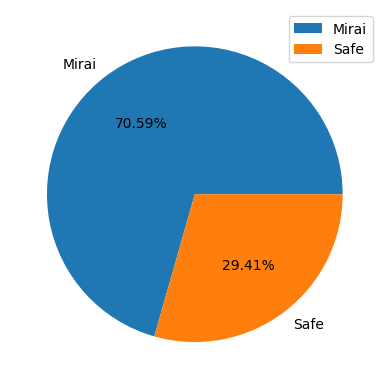

In [8]:
#Converts Benign to safe and all others to Malicious
print(len(mb.label.value_counts().values.tolist()))

mb.label.replace(('BenignTraffic'), ('Safe'), inplace=True)
print(len(mb.label.value_counts().values.tolist()))

mb.label = mb.label.apply(lambda x: x if x == 'Safe' else 'Mirai')

# Print lengths for debugging
print(len(mb.label.value_counts().values.tolist()))
print(len(['Mirai', 'Safe']))

plt.pie(mb.label.value_counts().values.tolist(), labels=['Mirai', 'Safe'], autopct='%.2f%%')
plt.legend()
plt.show()

# First, split the data to 70/30

In [9]:
mb.shape
print("Total:\t",mb.shape)

Y = mb['label']
X = mb.drop(['label'], axis=1)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
# define random_state to avoid a different random value, and subsequently avoid a different dataset split, each time we run the program

print("X train:",X_train.shape)
print("Y train:", y_train.shape)

print("X test:\t",X_test.shape)
print("Y test:\t", y_test.shape)

Total:	 (719660, 47)
X train: (503762, 46)
Y train: (503762,)
X test:	 (215898, 46)
Y test:	 (215898,)


In [10]:
#Mirai vs safe in training set
y_train.value_counts()

Mirai    355845
Safe     147917
Name: label, dtype: int64

# First, try decision tree without feature selection
## Train and evaluate classification tree



In [11]:
tree_classifier = tree.DecisionTreeClassifier(random_state=10)

In [12]:
tree1 = tree_classifier.fit(X_train, y_train)

In [13]:
tree1.score(X_test, y_test)

0.9994812365098333

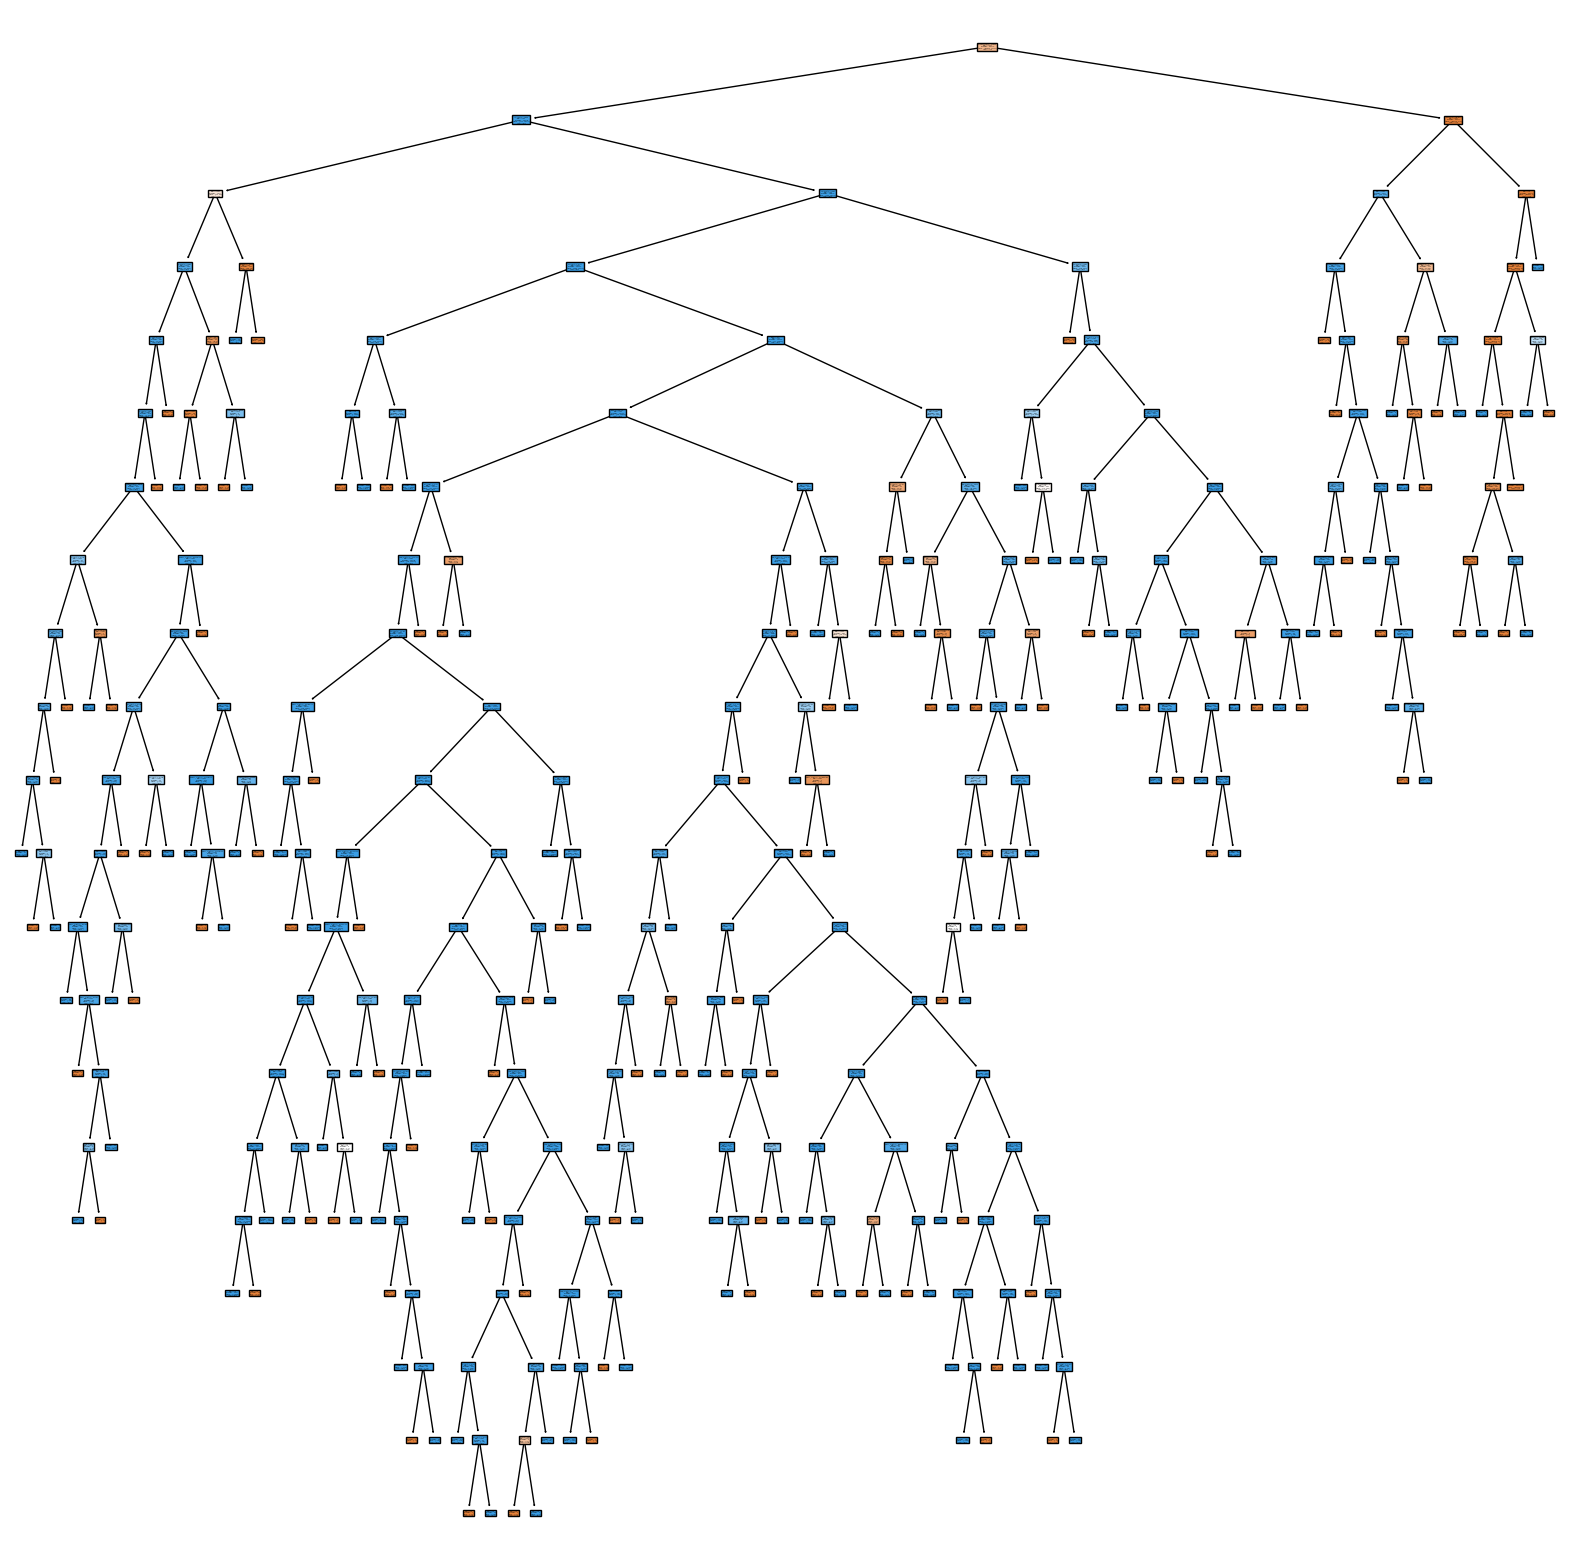

In [14]:
plt.figure(figsize = (20, 20))
tree.plot_tree(tree1, feature_names = list(X.columns), class_names = ['Safe', 'Mirai'], filled = True);

Finding the most important feature

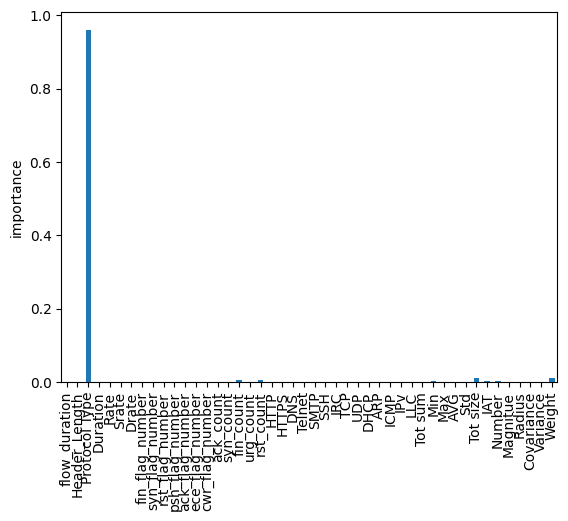

In [15]:
importance = tree1.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('importance');

## Show Dot plot to see the difference

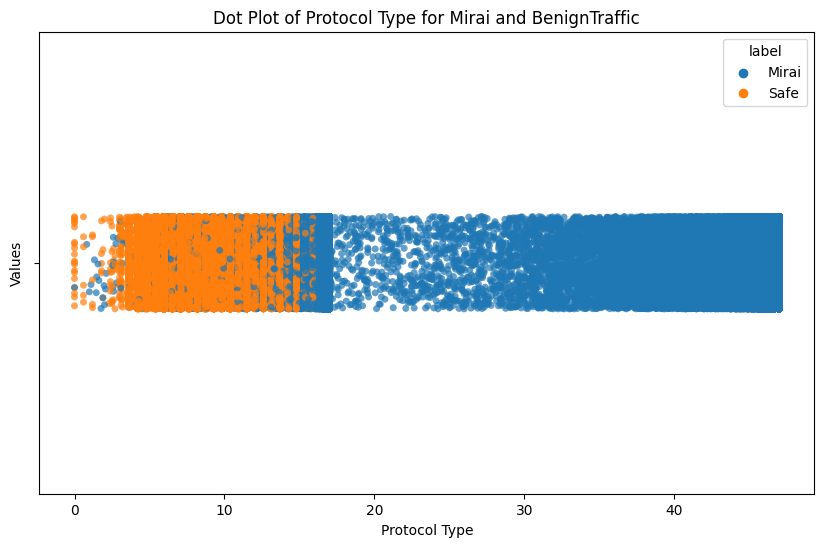

In [16]:
# Create a dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.stripplot(x='Protocol Type', jitter=True, hue='label', data=mb, marker='o', alpha=0.7)
plt.title('Dot Plot of Protocol Type for Mirai and BenignTraffic')
plt.xlabel('Protocol Type')
plt.ylabel('Values')
plt.show()

## Separate the dots

<Figure size 2000x600 with 0 Axes>

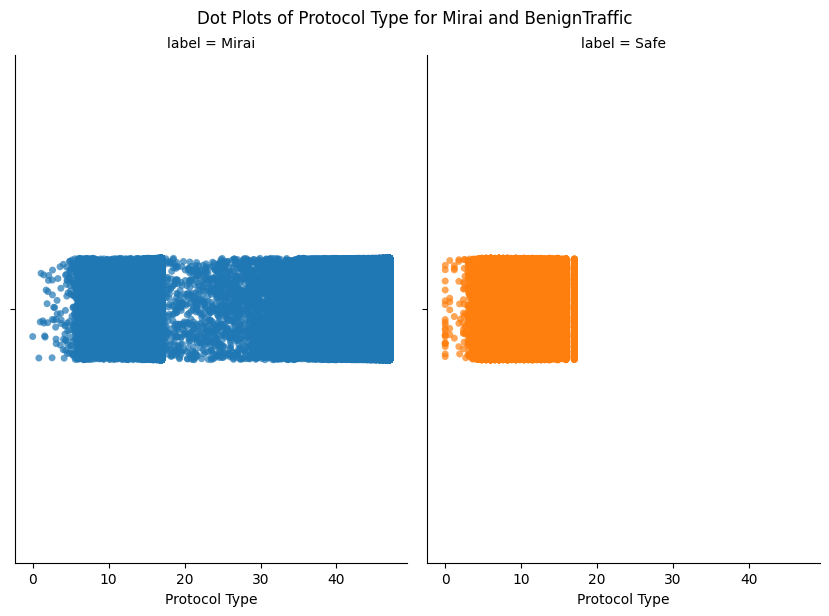

In [17]:
plt.figure(figsize=(20, 6))
sns.catplot(x='Protocol Type', hue='label', col='label', kind='strip', data=mb, marker='o', alpha=0.7, height=6, aspect=0.7)
plt.suptitle('Dot Plots of Protocol Type for Mirai and BenignTraffic', y=1.02)
plt.xlabel('Protocol Type')
plt.ylabel('Values')
plt.show()

## Drop Protocol type and create new tree

In [18]:
mb2 = mb.drop(columns=['Protocol Type'], axis=1)

In [19]:
mb2.shape
print("Total:\t",mb2.shape)

Y = mb2['label']
X = mb2.drop(['label'], axis=1)

# Split the dataset into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size = 0.3, random_state = 100)
# define random_state to avoid a different random value, and subsequently avoid a different dataset split, each time we run the program

print("X train:",X_train2.shape)
print("Y train:", y_train2.shape)

print("X test:\t",X_test2.shape)
print("Y test:\t", y_test2.shape)

Total:	 (719660, 46)
X train: (503762, 45)
Y train: (503762,)
X test:	 (215898, 45)
Y test:	 (215898,)


In [20]:
tree_classifier2 = tree.DecisionTreeClassifier(random_state=10)

In [21]:
tree2 = tree_classifier2.fit(X_train2, y_train2)

In [22]:
tree2.score(X_test2, y_test2)

0.9996433501005104

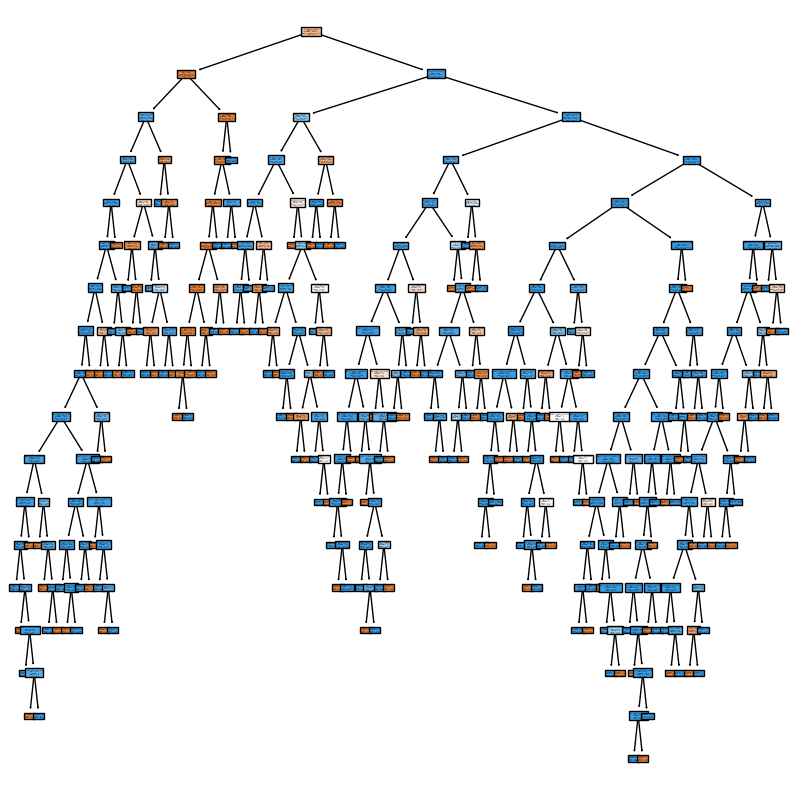

In [23]:
plt.figure(figsize = (10, 10))
tree.plot_tree(tree2, feature_names = list(X.columns), class_names = ['Safe', 'Mirai'], filled = True);

Find the new important feature

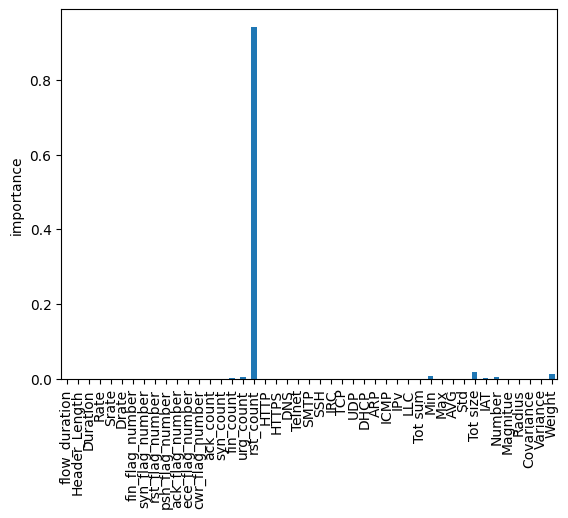

In [24]:
importance = tree2.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('importance');

## Show the new Dot Plot

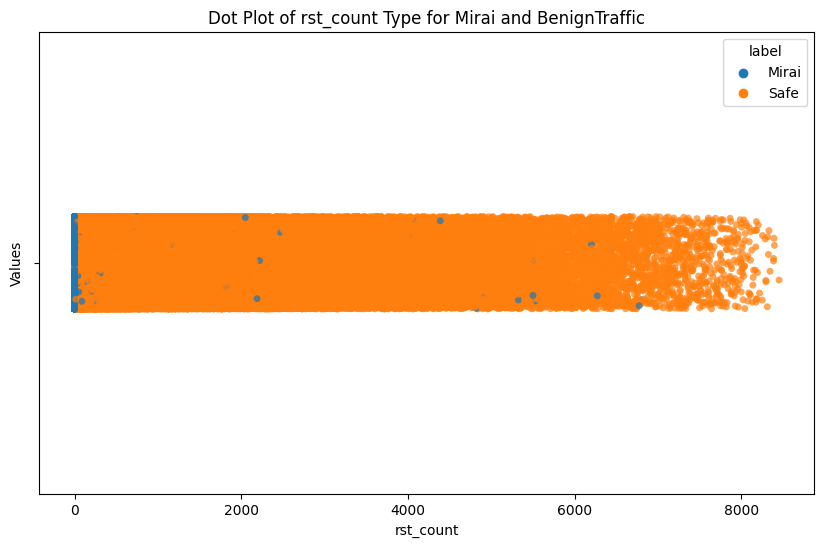

In [25]:
# Create a dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.stripplot(x='rst_count', jitter=True, hue='label', data=mb, marker='o', alpha=0.7)
plt.title('Dot Plot of rst_count Type for Mirai and BenignTraffic')
plt.xlabel('rst_count')
plt.ylabel('Values')
plt.show()

## Separate the dots

<Figure size 2000x600 with 0 Axes>

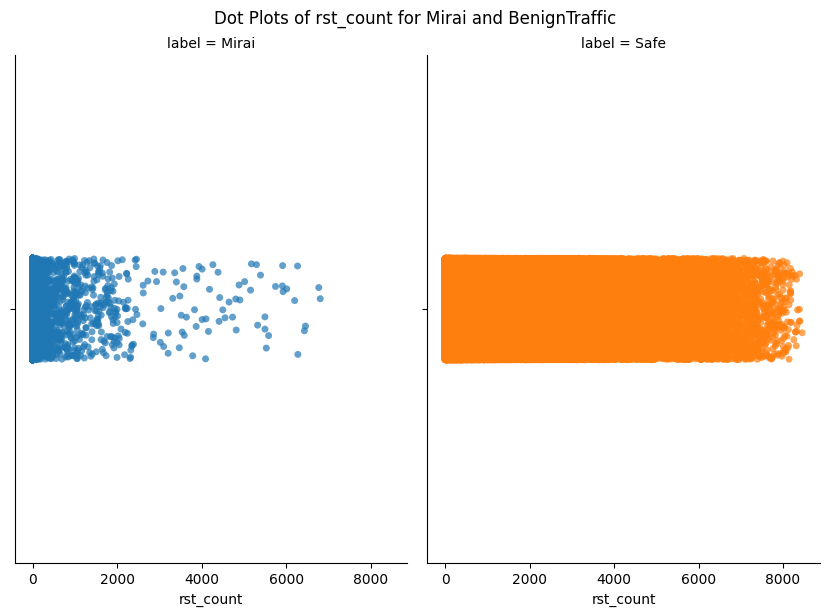

In [26]:
plt.figure(figsize=(20, 6))
sns.catplot(x='rst_count', hue='label', col='label', kind='strip', data=mb, marker='o', alpha=0.7, height=6, aspect=0.7)
plt.suptitle('Dot Plots of rst_count for Mirai and BenignTraffic', y=1.02)
plt.xlabel('rst_count')
plt.ylabel('Values')
plt.show()

## Now drop rst_count and create a new tree

In [27]:
mb3 = mb2.drop(columns=['rst_count'], axis=1)

In [28]:
mb3.shape
print("Total:\t",mb3.shape)

Y = mb3['label']
X = mb3.drop(['label'], axis=1)

# Split the dataset into train and test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y, test_size = 0.3, random_state = 100)
# define random_state to avoid a different random value, and subsequently avoid a different dataset split, each time we run the program

print("X train:",X_train3.shape)
print("Y train:", y_train3.shape)

print("X test:\t",X_test3.shape)
print("Y test:\t", y_test3.shape)

Total:	 (719660, 45)
X train: (503762, 44)
Y train: (503762,)
X test:	 (215898, 44)
Y test:	 (215898,)


In [29]:
tree_classifier3 = tree.DecisionTreeClassifier(random_state=10)

In [30]:
tree3 = tree_classifier3.fit(X_train3, y_train3)

In [31]:
print(tree3.score(X_test3, y_test3))

0.9997220909874107


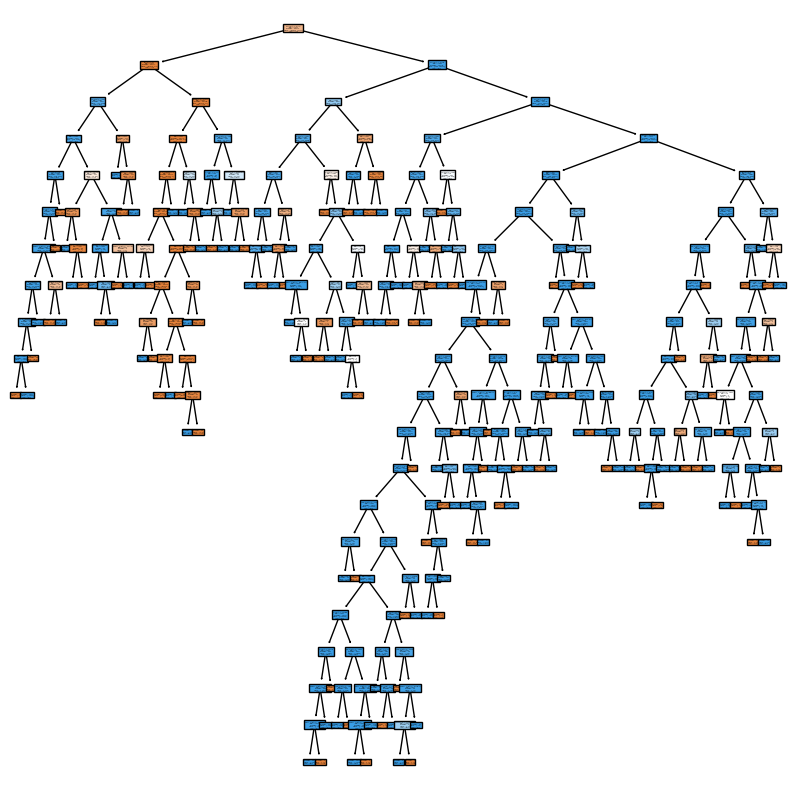

In [32]:
plt.figure(figsize = (10, 10))
tree.plot_tree(tree3, feature_names = list(X.columns), class_names = ['Safe', 'Mirai'], filled = True);

Look for the new important feature

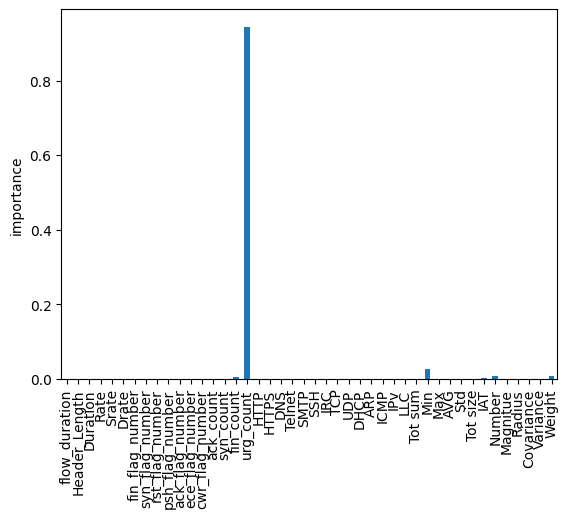

In [33]:
importance = tree3.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('importance');

## Show Dot Plot

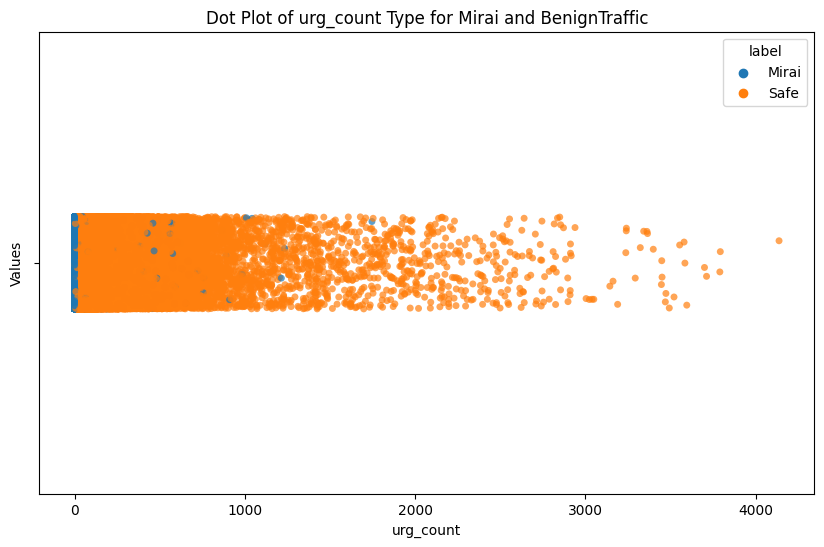

In [34]:
# Create a dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.stripplot(x='urg_count', jitter=True, hue='label', data=mb, marker='o', alpha=0.7)
plt.title('Dot Plot of urg_count Type for Mirai and BenignTraffic')
plt.xlabel('urg_count')
plt.ylabel('Values')
plt.show()

## Separate the dots

<Figure size 2000x600 with 0 Axes>

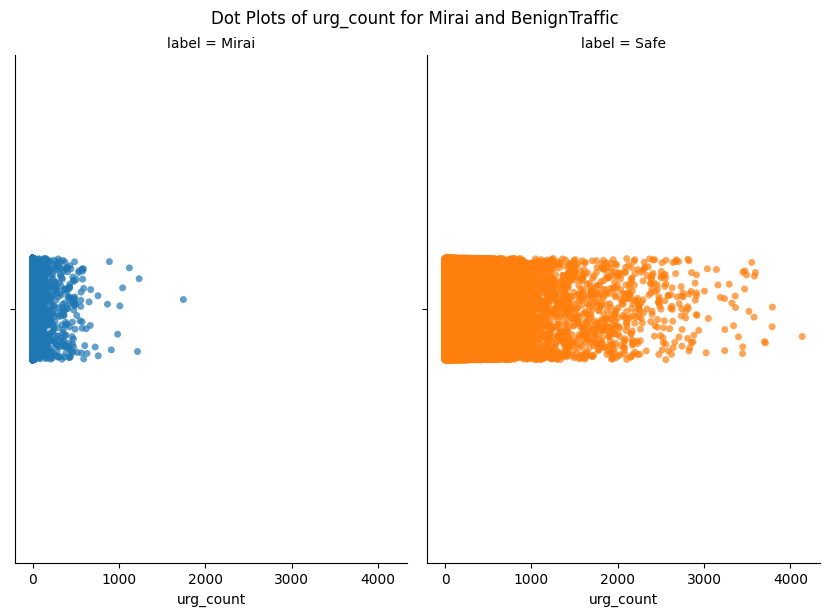

In [35]:
plt.figure(figsize=(20, 6))
sns.catplot(x='urg_count', hue='label', col='label', kind='strip', data=mb, marker='o', alpha=0.7, height=6, aspect=0.7)
plt.suptitle('Dot Plots of urg_count for Mirai and BenignTraffic', y=1.02)
plt.xlabel('urg_count')
plt.ylabel('Values')
plt.show()

#Confusion Matrix for decision tree (original)

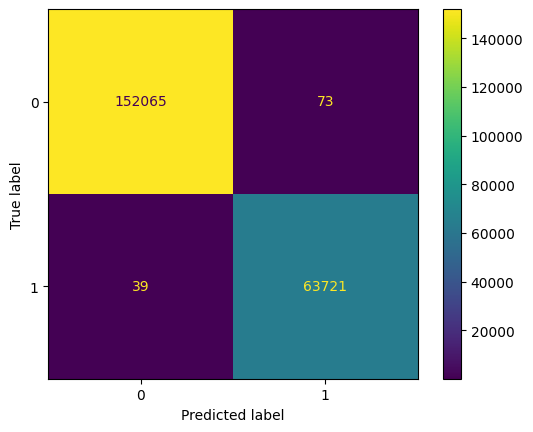


Accuracy: 0.999481

F1 score: [0.99963187 0.99912194]
              precision    recall  f1-score   support

       Mirai       1.00      1.00      1.00    152104
        Safe       1.00      1.00      1.00     63794

    accuracy                           1.00    215898
   macro avg       1.00      1.00      1.00    215898
weighted avg       1.00      1.00      1.00    215898



In [36]:
#Make predictions
y_pred1 = tree1.predict(X_test)

#confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred1)
print("\nAccuracy: %f" % acc)

f1 = f1_score(y_test, y_pred1, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred1,y_test))

## Confusion Matrix without protocol type

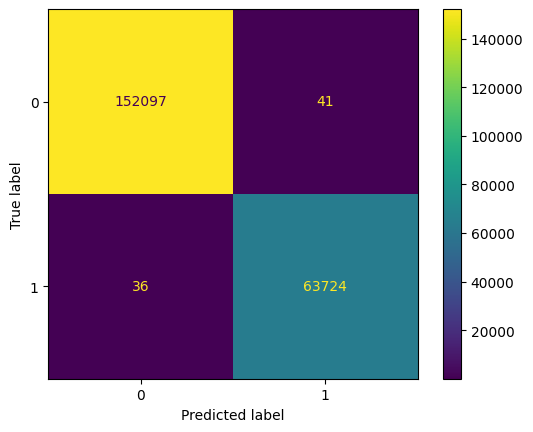


Accuracy: 0.999643

F1 score: [0.99974694 0.9993962 ]
              precision    recall  f1-score   support

       Mirai       1.00      1.00      1.00    152133
        Safe       1.00      1.00      1.00     63765

    accuracy                           1.00    215898
   macro avg       1.00      1.00      1.00    215898
weighted avg       1.00      1.00      1.00    215898



In [37]:
#Make predictions
y_pred2 = tree2.predict(X_test2)

#confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

acc2 = accuracy_score(y_test2, y_pred2)
print("\nAccuracy: %f" % acc2)

f1_2 = f1_score(y_test2, y_pred2, average=None)
print("\nF1 score:", f1_2)

print(classification_report(y_pred2,y_test2))

## Confusion matrix without protocol type and rst_counter

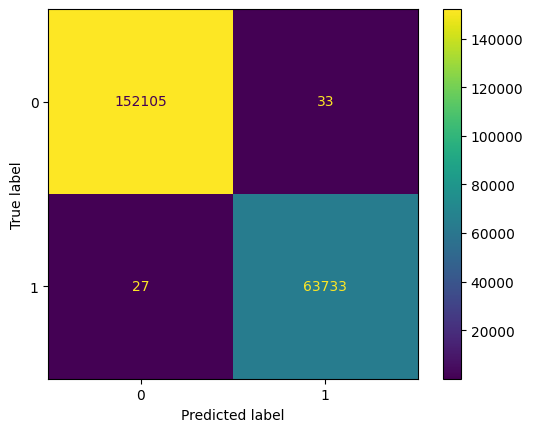


Accuracy: 0.999722

F1 score: [0.99980281 0.99952951]
              precision    recall  f1-score   support

       Mirai       1.00      1.00      1.00    152132
        Safe       1.00      1.00      1.00     63766

    accuracy                           1.00    215898
   macro avg       1.00      1.00      1.00    215898
weighted avg       1.00      1.00      1.00    215898



In [38]:
#Make predictions
y_pred3 = tree3.predict(X_test3)

#confusion matrix
cm3 = confusion_matrix(y_test3, y_pred3)

disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.show()

acc3 = accuracy_score(y_test3, y_pred3)
print("\nAccuracy: %f" % acc3)

f1_3 = f1_score(y_test3, y_pred3, average=None)
print("\nF1 score:", f1_3)

print(classification_report(y_pred3,y_test3))

# Random Forest

In [39]:
rf_c1 = RandomForestClassifier(criterion = "gini", max_depth = 8, min_samples_split = 10, random_state=10)

In [40]:
rf_c1.fit(X_train, y_train)
rf_c1.score(X_test, y_test)

0.9997313546211637

In [41]:
X_test.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'],
      dtype='object')

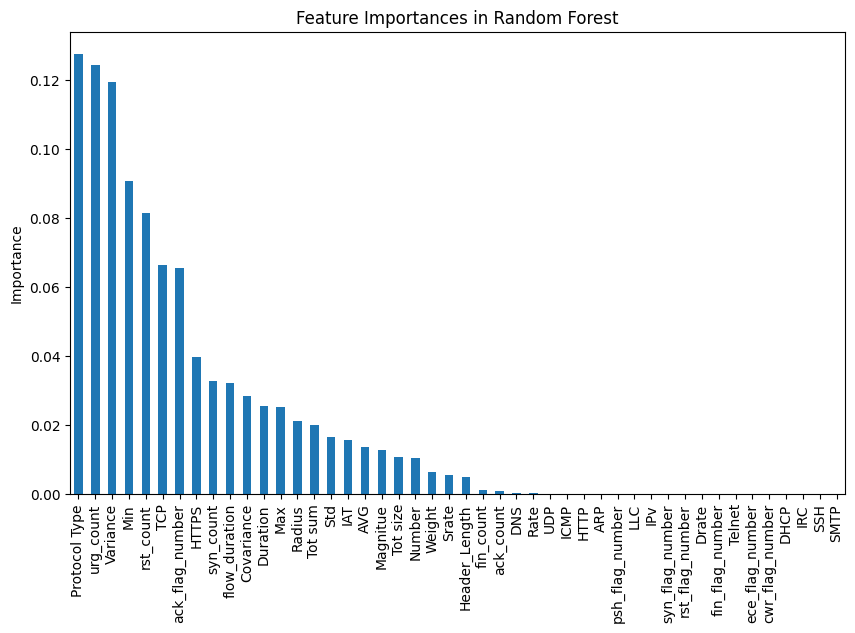

In [42]:
importance_rf = rf_c1.feature_importances_
feature_importance_rf = pd.Series(importance_rf, index = X_test.columns)
plt.figure(figsize=(10, 6))
feature_importance_rf.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.show()


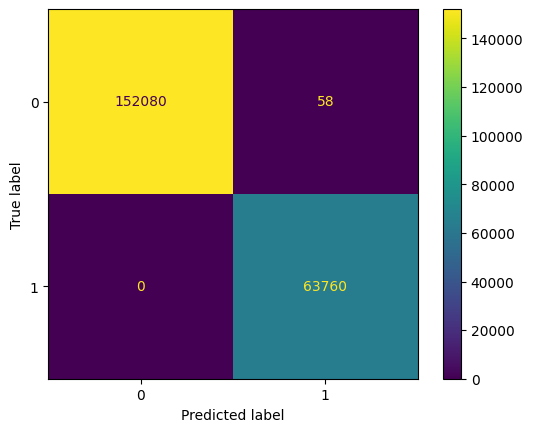


Accuracy: 0.999731

F1 score: [0.99980935 0.99954538]
              precision    recall  f1-score   support

       Mirai       1.00      1.00      1.00    152080
        Safe       1.00      1.00      1.00     63818

    accuracy                           1.00    215898
   macro avg       1.00      1.00      1.00    215898
weighted avg       1.00      1.00      1.00    215898



In [43]:
#Make predictions
y_pred3 = rf_c1.predict(X_test)

#confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)

disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.show()

acc3 = accuracy_score(y_test, y_pred3)
print("\nAccuracy: %f" % acc3)

f1_3 = f1_score(y_test, y_pred3, average=None)
print("\nF1 score:", f1_3)

print(classification_report(y_pred3,y_test))

# logistic Regression
## logistic regression with all features

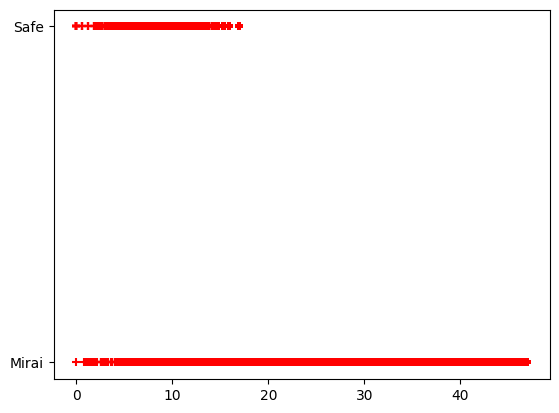

In [44]:
plt.scatter(mb["Protocol Type"], mb.label, marker='+', color='red')

In [45]:
lr_model = LogisticRegression()

In [46]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [47]:
lr_model.score(X_test, y_test)

0.934524636633966

## logistic regression with only protocol type

In [48]:
lr_model2 = LogisticRegression()
lr_model2.fit(X_train[["Protocol Type"]], y_train)

LogisticRegression()

In [49]:
predictions = lr_model2.predict(X_test[['Protocol Type']])
predictions

array(['Mirai', 'Mirai', 'Mirai', ..., 'Safe', 'Mirai', 'Safe'],
      dtype=object)

In [50]:
lr_model2.score(X_test[['Protocol Type']], y_test)

0.9850623905733263

## logistic regression with only rst_count

In [51]:
lr_model3 = LogisticRegression()

In [52]:
lr_model3.fit(X_train[['rst_count']], y_train)

LogisticRegression()

In [53]:
lr_model3.score(X_test[['rst_count']], y_test)

0.960161743045327

## logistic regression with only urg_count

In [54]:
lr_model4 = LogisticRegression()

In [55]:
lr_model4.fit(X_train[['urg_count']], y_train)

LogisticRegression()

In [56]:
lr_model4.score(X_test[['urg_count']], y_test)

0.9654049597495113

## Confusion Matrixes for logistic regression

LR with all features

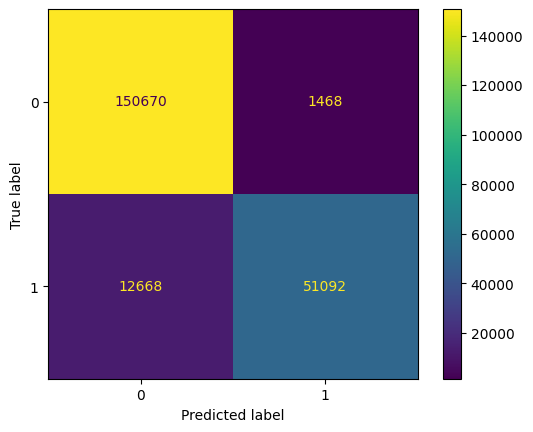


Accuracy: 0.934525

F1 score: [0.95519152 0.87847318]
              precision    recall  f1-score   support

       Mirai       0.99      0.92      0.96    163338
        Safe       0.80      0.97      0.88     52560

    accuracy                           0.93    215898
   macro avg       0.90      0.95      0.92    215898
weighted avg       0.94      0.93      0.94    215898



In [57]:
#Make predictions
y_pred4 = lr_model.predict(X_test)

#confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)

disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot()
plt.show()

acc4 = accuracy_score(y_test, y_pred4)
print("\nAccuracy: %f" % acc4)

f1_4 = f1_score(y_test, y_pred4, average=None)
print("\nF1 score:", f1_4)

print(classification_report(y_pred4,y_test))

LR with only protocol_type

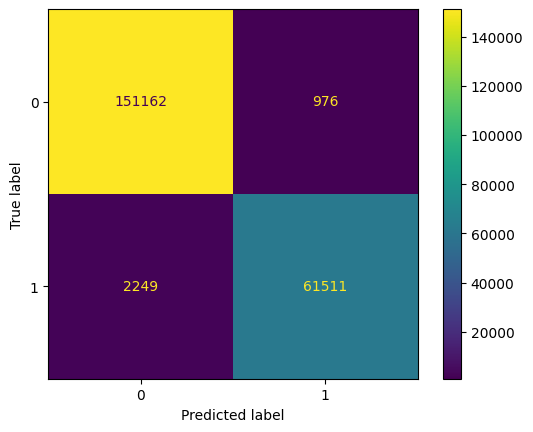


Accuracy: 0.985062

F1 score: [0.98944523 0.97445484]
              precision    recall  f1-score   support

       Mirai       0.99      0.99      0.99    153411
        Safe       0.96      0.98      0.97     62487

    accuracy                           0.99    215898
   macro avg       0.98      0.98      0.98    215898
weighted avg       0.99      0.99      0.99    215898



In [58]:
#Make predictions
y_pred5 = lr_model2.predict(X_test[['Protocol Type']])

#confusion matrix
cm5 = confusion_matrix(y_test, y_pred5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm5)
disp.plot()
plt.show()

acc5 = accuracy_score(y_test, y_pred5)
print("\nAccuracy: %f" % acc5)

f1_5 = f1_score(y_test, y_pred5, average=None)
print("\nF1 score:", f1_5)

print(classification_report(y_pred5,y_test))

LR with only rst_count

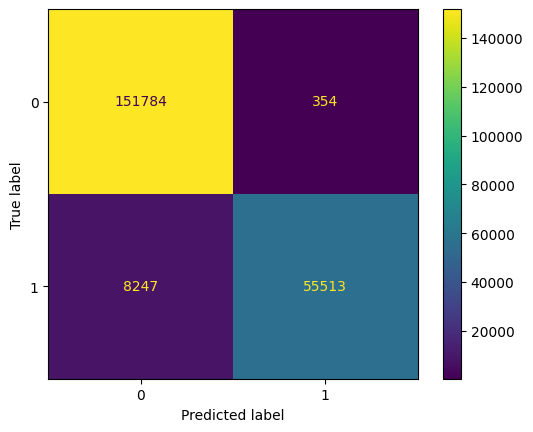


Accuracy: 0.960162

F1 score: [0.97244762 0.92810152]
              precision    recall  f1-score   support

       Mirai       1.00      0.95      0.97    160031
        Safe       0.87      0.99      0.93     55867

    accuracy                           0.96    215898
   macro avg       0.93      0.97      0.95    215898
weighted avg       0.96      0.96      0.96    215898



In [59]:
#Make predictions
y_pred6 = lr_model3.predict(X_test[['rst_count']])

#confusion matrix
cm6 = confusion_matrix(y_test, y_pred6)

disp = ConfusionMatrixDisplay(confusion_matrix=cm6)
disp.plot()
plt.show()

acc6 = accuracy_score(y_test, y_pred6)
print("\nAccuracy: %f" % acc6)

f1_6 = f1_score(y_test, y_pred6, average=None)
print("\nF1 score:", f1_6)

print(classification_report(y_pred6,y_test))